## Data Wrangling II
### Perform the following operations using Python on any open source dataset (eg. data.csv)
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 

3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. 

Reason and document your approach properly

## Import all the required Python Libraries.

In [141]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


## Load the Dataset into pandas data frame.

In [142]:
dataset = pd.read_csv('StudentsPerformance_modified.csv')

In [143]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,NaN,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [144]:
dataset.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [145]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     9
reading score                  6
writing score                  9
dtype: int64

In [146]:
dataset.rename(columns = {'math score': 'math_score'},inplace = True)
dataset.rename(columns = {'reading score': 'reading_score'},inplace = True)
dataset.rename(columns = {'writing score': 'writing_score'},inplace = True)

In [147]:
dataset.replace('?',np.nan, inplace = True)

In [148]:
dataset.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math_score                     44
reading_score                   6
writing_score                   9
dtype: int64

In [149]:
dataset['math_score'] = dataset.math_score.astype(float)

In [150]:
dataset.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math_score                     float64
reading_score                  float64
writing_score                  float64
dtype: object

In [151]:
dataset.describe()

,math_score,reading_score,writing_score
count,956.000000,994.000000,991.000000
mean,66.321130,68.008048,69.487386
std,18.289482,16.602270,29.563757
min,-89.000000,3.000000,10.000000
25%,57.000000,58.000000,57.000000
50%,66.000000,69.500000,69.000000
75%,77.000000,79.000000,79.000000
max,334.000000,100.000000,567.000000


<AxesSubplot:>

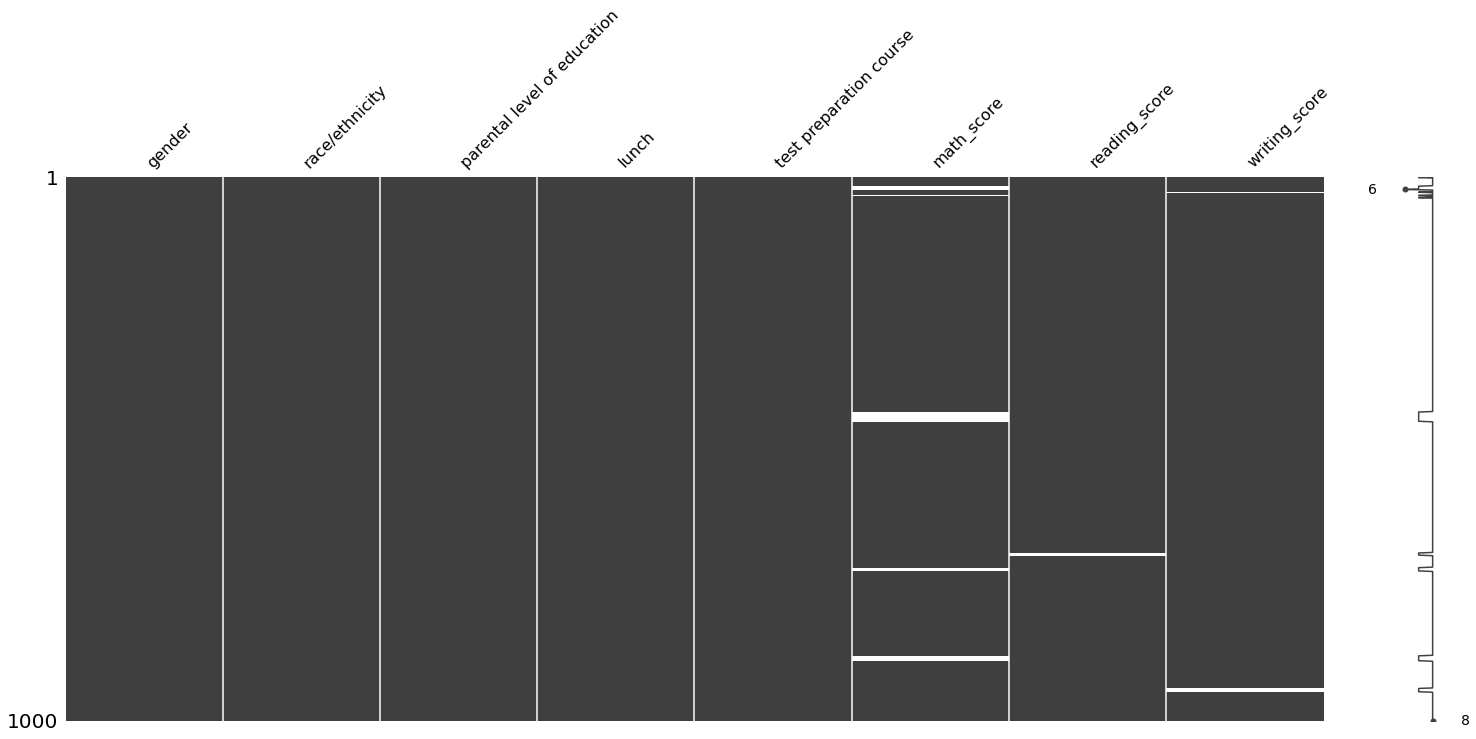

In [152]:
import missingno as msno
msno.matrix(dataset)

In [153]:
labelencoder = LabelEncoder()
dataset['parental level of education'] = labelencoder.fit_transform(dataset['parental level of education'])
dataset['lunch'] = labelencoder.fit_transform(dataset['lunch'])
dataset['test preparation course'] = labelencoder.fit_transform(dataset['test preparation course'])

In [154]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,1,1,1,72.0,72.0,74.0
1,female,group C,4,1,0,NaN,90.0,88.0
2,female,group B,3,1,1,90.0,95.0,93.0
3,male,group A,0,0,1,47.0,57.0,44.0
4,male,group C,4,1,1,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,3,1,0,88.0,99.0,95.0
996,male,group C,2,0,1,62.0,55.0,55.0
997,female,group C,2,0,0,59.0,71.0,65.0
998,female,group D,4,1,0,68.0,78.0,77.0


In [155]:
numeric_columns = ['math_score','reading_score','writing_score']
medianFiller = lambda x: x.fillna(x.median())
dataset[numeric_columns] = dataset[numeric_columns].apply(medianFiller, axis=0)

In [156]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

C:\Users\Vrushaket\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math_score', ylabel='Density'>

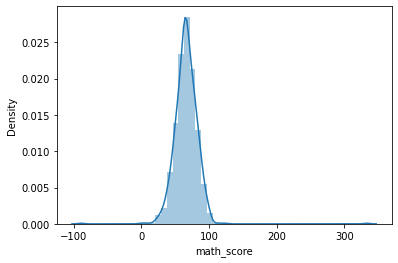

In [157]:
sns.distplot(dataset['math_score'])

C:\Users\Vrushaket\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading_score', ylabel='Density'>

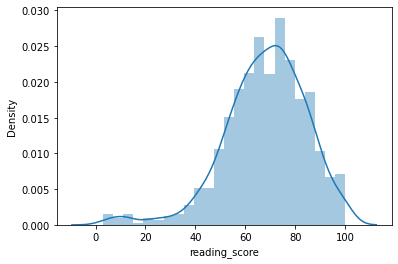

In [158]:
sns.distplot(dataset['reading_score'])

C:\Users\Vrushaket\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing_score', ylabel='Density'>

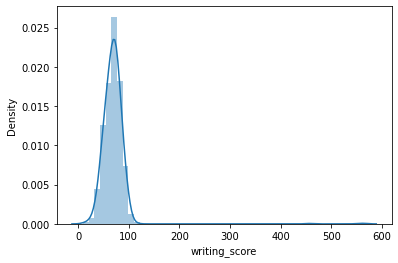

In [159]:
sns.distplot(dataset['writing_score'])

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 

Outlier : an observation point that is distant from other observations.
Defined as the point of data that lies over 1.5 interquartile range below first quartile and third quartile in dataset.
IQR = Q3 - Q1

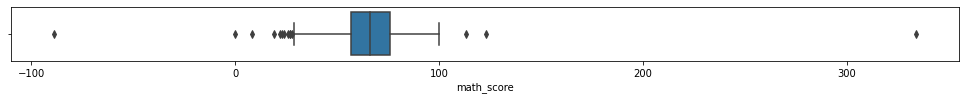

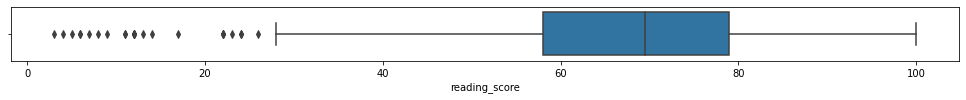

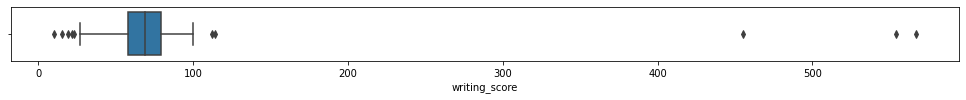

In [160]:
for column in numeric_columns:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=dataset,x=column)

In [161]:
math_score = dataset['math_score'].values
math_score = np.sort(math_score)
math_score_Q1 = math_score[250]
math_score_Q3 = math_score[750]    
math_score_Q1,math_score_Q3

(57.0, 76.0)

In [162]:
Q1 = int((math_score.size +1) * 1/4)     # lower quartile
Q2 = int((math_score.size +1) * 2/4)     # middle quartile
Q3 = int((math_score.size +1) * 3/4)     # upper quartile
math_score[Q1], math_score[Q2], math_score[Q3]

(57.0, 66.0, 76.0)

In [163]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
Q1,Q3

(parental level of education     1.0
 lunch                           0.0
 test preparation course         0.0
 math_score                     57.0
 reading_score                  58.0
 writing_score                  58.0
 Name: 0.25, dtype: float64,
 parental level of education     4.0
 lunch                           1.0
 test preparation course         1.0
 math_score                     76.0
 reading_score                  79.0
 writing_score                  79.0
 Name: 0.75, dtype: float64)

In [164]:
IQR = Q3 - Q1
IQR

parental level of education     3.0
lunch                           1.0
test preparation course         1.0
math_score                     19.0
reading_score                  21.0
writing_score                  21.0
dtype: float64

In [165]:
low = Q1 - 1.5 * IQR
high= Q3 + 1.5 * IQR
print(low,high)

parental level of education    -3.5
lunch                          -1.5
test preparation course        -1.5
math_score                     28.5
reading_score                  26.5
writing_score                  26.5
dtype: float64 parental level of education      8.5
lunch                            2.5
test preparation course          2.5
math_score                     104.5
reading_score                  110.5
writing_score                  110.5
dtype: float64


In [166]:
dataset2 = dataset[~((dataset < low) | (dataset >high)).any(axis=1)]
print(dataset.shape,dataset2.shape)


(1000, 8) (960, 8)


C:\Users\VRUSHA~1\AppData\Local\Temp/ipykernel_8576/1164286700.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset2 = dataset[~((dataset < low) | (dataset >high)).any(axis=1)]


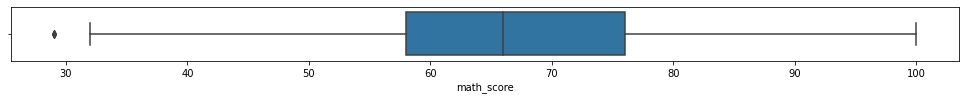

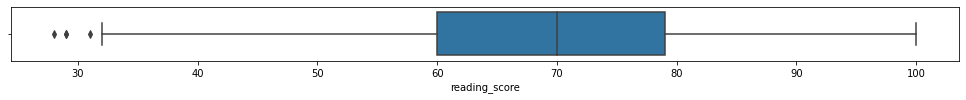

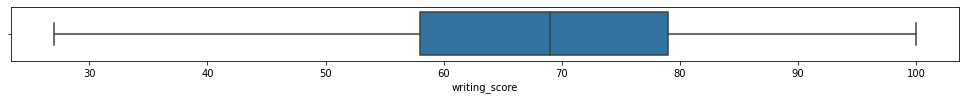

In [167]:
for column in numeric_columns:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=dataset2,x=column)

3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [168]:
dataset['math_score']

0      72.0
1      66.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math_score, Length: 1000, dtype: float64

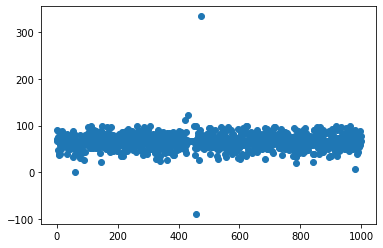

In [169]:
plt.scatter(y = dataset['math_score'], x = dataset.index)

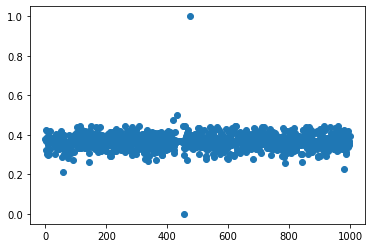

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[['math_score']] = scaler.fit_transform(dataset[['math_score']])
plt.scatter(y = dataset['math_score'], x = dataset.index)  